# Data Handling:

### In this section, we will focus on data handling. This Python notebook is designed to explain what we did to handle the data and why.

**Written by: Nadav Bitran Numa and Maor Bezalel**

## Preceding Step - import modules (packages)
This step is necessary in order to use external packages.

**Using the following libraries:**

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the main dataset

In [45]:
nadlan_df = pd.read_csv("Raw Data\AllCities.csv")

## Basic data Exploration

In this section, we will look at how many records we received for the city of Holon

In [46]:
nadlan_df.shape

(314402, 10)

In [47]:
nadlan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314402 entries, 0 to 314401
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Sale_Date        314402 non-null  object 
 1   City             314402 non-null  object 
 2   Neighborhood     314402 non-null  object 
 3   Street           277358 non-null  object 
 4   Building_Number  277358 non-null  float64
 5   Property_Type    279421 non-null  object 
 6   Rooms            314402 non-null  float64
 7   Floor            284786 non-null  object 
 8   Square_Meter     314402 non-null  float64
 9   Price            314402 non-null  object 
dtypes: float64(3), object(7)
memory usage: 24.0+ MB


#### Table:

In [48]:
cities_len_dict = {city:len(nadlan_df[nadlan_df["City"] == city]) for city in nadlan_df["City"].unique()}
cities_len_df = pd.DataFrame({"City":cities_len_dict.keys(), "Number_Of_Housing_Units":cities_len_dict.values()})
cities_len_df

,City,Number_Of_Housing_Units
0,אשדוד,28443
1,בת ים,29548
2,אילת,1318
3,גבעתיים,13353
4,גבעת זאב,448
5,הרצלייה,19762
6,הוד השרון,12553
7,חולון,36901
8,נס ציונה,8771
9,אופקים,4137


#### Visualization:

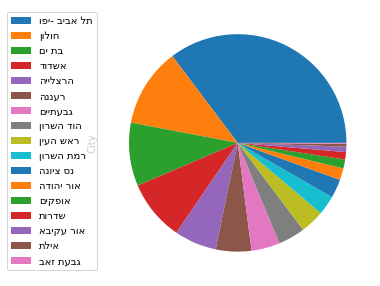

In [49]:
cities_len_df = cities_len_df.sort_values(by=['Number_Of_Housing_Units'],ascending=False)
cities_len_df.reset_index(drop=True,inplace=True)

figure = plt.figure(figsize = (10,5))
ax = plt.gca()
# The cities names written in hebrew and for some reason they are displayed
# in the pie chart in reverse order. In order to overcome that, we
# created a labels list with the reversed cities names, so that it will be displayed
# properly
labels = []
for key in range(len(cities_len_df)):
    labels.append(cities_len_df['City'][key][::-1])

nadlan_df.City.value_counts().plot(kind="pie",labels=None)
ax.legend(labels , bbox_to_anchor=(0,1), fontsize=10)

[Text(0, 0, 'ופי- ביבא לת'),
 Text(0, 1, 'ןולוח'),
 Text(0, 2, 'םי תב'),
 Text(0, 3, 'דודשא'),
 Text(0, 4, 'היילצרה'),
 Text(0, 5, 'הננער'),
 Text(0, 6, 'םייתעבג'),
 Text(0, 7, 'ןורשה דוה'),
 Text(0, 8, 'ןיעה שאר'),
 Text(0, 9, 'ןורשה תמר'),
 Text(0, 10, 'הנויצ סנ'),
 Text(0, 11, 'הדוהי רוא'),
 Text(0, 12, 'םיקפוא'),
 Text(0, 13, 'תורדש'),
 Text(0, 14, 'אביקע רוא'),
 Text(0, 15, 'תליא'),
 Text(0, 16, 'באז תעבג')]

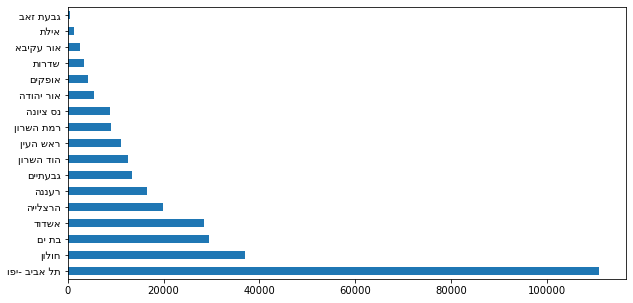

In [50]:
figure = plt.figure(figsize = (10,5))
ax2 = plt.gca()
nadlan_df.City.value_counts().plot(kind="barh")
ax2.set_yticklabels(labels)

## Basic data Exploration: Conclusions

1) As we can see, we have about 314,402 records 

2) But now we have reached an important conclusion that will accompany us later on: 
 **as you can see, the column "Street" and the column "Building_Number" are the only ones in which there is no shortage of data. But is this really true?... The answer is no!!!**
For all other columns, the missing data is hidden under an empty string consisting solely of a space.

key.e. that even before starting the treatment, we need to locate all this data and turn it into NaN values:

## Replacing spaces into NaN values:

In [51]:
for column in nadlan_df.columns:
    nadlan_df[column].replace(to_replace=' ', value=np.nan, inplace=True)

In [52]:
nadlan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314402 entries, 0 to 314401
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Sale_Date        314402 non-null  object 
 1   City             314402 non-null  object 
 2   Neighborhood     314402 non-null  object 
 3   Street           277358 non-null  object 
 4   Building_Number  277358 non-null  float64
 5   Property_Type    279421 non-null  object 
 6   Rooms            314402 non-null  float64
 7   Floor            284786 non-null  object 
 8   Square_Meter     314402 non-null  float64
 9   Price            314402 non-null  object 
dtypes: float64(3), object(7)
memory usage: 24.0+ MB


## Replacing spaces into NaN values: Conclusions
Once we've sorted out the issue before, we can officially begin the data handling process!. And the first thing we will start with is: removing data that we are not interested in

# 

# 

# Step 1: The data handling - Duplication Phase

## 1.1: Removing Fully Duplicated Rows:

In [53]:
print(f"Number Of Duplicated Rows (Before Handling): {sum(nadlan_df.duplicated())}")
nadlan_df.drop_duplicates(subset=None,keep="first",inplace=True)
print(f"Number Of Duplicated Rows (After Handling): {sum(nadlan_df.duplicated())}")

nadlan_df.info()

Number Of Duplicated Rows (Before Handling): 1252
Number Of Duplicated Rows (After Handling): 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 313150 entries, 0 to 314401
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Sale_Date        313150 non-null  object 
 1   City             313150 non-null  object 
 2   Neighborhood     313150 non-null  object 
 3   Street           276181 non-null  object 
 4   Building_Number  276181 non-null  float64
 5   Property_Type    278293 non-null  object 
 6   Rooms            313150 non-null  float64
 7   Floor            283821 non-null  object 
 8   Square_Meter     313150 non-null  float64
 9   Price            313150 non-null  object 
dtypes: float64(3), object(7)
memory usage: 26.3+ MB


# Step 2: The data handling - Main Phase

Because the date of sale columns, and the city name column are full (*and will always be filled according to the way we redeemed our scraper*). We can start straight from handling the neighbors column:

## 2.1: Neighborhood Column

### 2.1.1: Removing Data About Neighborhoods Industrial Zones

The first thing we need to do, is to get rid of all the records belonging to the neighborhoods of industrial zones. **From the simple assumption that all records from there are not related to residential apartments**

In [54]:
print("Before:")
nadlan_df[nadlan_df["Neighborhood"].str.contains("אזור תעשיה") == True]

Before:


,Sale_Date,City,Neighborhood,Street,Building_Number,Property_Type,Rooms,Floor,Square_Meter,Price
0,13.03.2022,אשדוד,אזור תעשיה הצפוני,NaN,NaN,ללא תיכנון,0.0,NaN,187.0,"3,454,000"
1,10.03.2022,אשדוד,אזור תעשיה הצפוני,NaN,NaN,ללא תיכנון,0.0,NaN,250.0,"4,041,000"
2,09.03.2022,אשדוד,אזור תעשיה הצפוני,NaN,NaN,ללא תיכנון,0.0,NaN,250.0,"323,000"
3,28.12.2021,אשדוד,אזור תעשיה הצפוני,החרושת,229.0,תעשיה,0.0,NaN,3542.0,"31,888,000"
4,04.10.2021,אשדוד,אזור תעשיה הצפוני,הפלדה,345.0,משרד,0.0,ראשונה,1063.0,"4,450,000"
...,...,...,...,...,...,...,...,...,...,...
298748,14.03.2018,הרצלייה,אזור תעשיה,גלגל הפלדה,10.0,דירה בבית קומות,3.0,NaN,84.0,"1,805,000"
298749,13.03.2018,הרצלייה,אזור תעשיה,גלגל הפלדה,10.0,דירה בבית קומות,3.0,NaN,84.0,"1,643,000"
298750,13.03.2018,הרצלייה,אזור תעשיה,גלגל הפלדה,10.0,דירה בבית קומות,3.0,NaN,85.0,"1,661,000"
298751,12.03.2018,הרצלייה,אזור תעשיה,גלגל הפלדה,10.0,דירה בבית קומות,3.0,NaN,78.0,"1,554,000"


In [55]:
# Dropping process
nadlan_df.drop(index=nadlan_df[nadlan_df['Neighborhood'].str.contains("אזור תעשיה")==True].index, inplace=True)

In [56]:
print("After:")
nadlan_df[nadlan_df['Neighborhood'].str.contains("אזור תעשיה")==True]

After:


,Sale_Date,City,Neighborhood,Street,Building_Number,Property_Type,Rooms,Floor,Square_Meter,Price


In [57]:
nadlan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308769 entries, 1028 to 314401
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Sale_Date        308769 non-null  object 
 1   City             308769 non-null  object 
 2   Neighborhood     308769 non-null  object 
 3   Street           273047 non-null  object 
 4   Building_Number  273047 non-null  float64
 5   Property_Type    274339 non-null  object 
 6   Rooms            308769 non-null  float64
 7   Floor            280292 non-null  object 
 8   Square_Meter     308769 non-null  float64
 9   Price            308769 non-null  object 
dtypes: float64(3), object(7)
memory usage: 25.9+ MB


## Neighborhood Column: Conclusions
Apart from removing the industrial zones, there is no need for additional handling of this column. So we can move on to the street name column

# 

##  2.2: Street Column & Building_Number Column

### 2.2.1: Replacing NaN values in Street column with Unknown

In [58]:
nadlan_df.Street.fillna("Unknown",inplace=True)

### 2.2.2: Replacing NaN values in Building_Number column with -1

In [59]:
nadlan_df.Building_Number.fillna(-1, inplace=True)

## Street Column & Building_Number Column: Conclustions
Apart from substituting the NaN value to Unknown and -1, there is no need to provide special care for these columns. Therefore, we can move on to the first column where we will have to start with a more advanced treatment: the propety type column

# 

## 2.3: Property_Type Column:

### 2.3.1: Removing all other unwanted building types

### In the "Property_Type" column, we have a lot of property types that do not represent residential residences.
### To get rid of them, we will only keep those who do.

In [60]:
to_keep_list = [
    "דירה בבית קומות",
    "בית פרטי",
    "קוטג' דו משפחתי",
    "קוטג' חד משפחתי",
    "קוטג' טורי",
    "בית בודד",
    "דירת גן",
    "דירת גג",
    "דירת גג (פנטהאוז)",
    "דופלקס",
    "מיני פנטהאוז",
    "חד משפחתי (וילה)"
]
nadlan_df = nadlan_df[nadlan_df["Property_Type"].isin(to_keep_list)]

In [61]:
nadlan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254893 entries, 1031 to 314401
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Sale_Date        254893 non-null  object 
 1   City             254893 non-null  object 
 2   Neighborhood     254893 non-null  object 
 3   Street           254893 non-null  object 
 4   Building_Number  254893 non-null  float64
 5   Property_Type    254893 non-null  object 
 6   Rooms            254893 non-null  float64
 7   Floor            238429 non-null  object 
 8   Square_Meter     254893 non-null  float64
 9   Price            254893 non-null  object 
dtypes: float64(3), object(7)
memory usage: 21.4+ MB


### 2.3.2: Removing any remaining NaN values

In [62]:
nadlan_df.dropna(subset=["Property_Type"], how='any', axis=0, inplace=True)

### 2.3.3: Uniting all similar apartment types into one type

In [63]:
to_replace_dict = {
    'דירת גג (פנטהאוז)': "דירת גג",
    "מיני פנטהאוז": "דירת גג",
    "קוטג' חד משפחתי": "קוטג'",
    "קוטג' דו משפחתי": "קוטג'",
    "קוטג' טורי": "קוטג'",
    "בית בודד": "בית פרטי",
    "חד משפחתי (וילה)": "בית פרטי",
    "דופלקס": "דירת גג",
    "דירה בבית קומות": "דירה בבניין"
}

nadlan_df.replace(to_replace_dict, inplace=True)

nadlan_df.Property_Type.value_counts()


דירה בבניין    236775
קוטג'           11732
בית פרטי         2421
דירת גן          2198
דירת גג          1767
Name: Property_Type, dtype: int64

### 2.3.4: Turning the column from a string to a categorical variable type

In [64]:
temp = list(nadlan_df.Property_Type.unique())
temp.sort(reverse=False)
temp_range = range(len(temp))
replace_map = dict(zip(temp, temp_range))

nadlan_df.replace(replace_map, inplace=True)
nadlan_df.Property_Type.unique()

array([1, 2, 3, 4, 0], dtype=int64)

In [65]:
nadlan_df.Property_Type.value_counts()

1    236775
4     11732
0      2421
3      2198
2      1767
Name: Property_Type, dtype: int64

In [66]:
nadlan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254893 entries, 1031 to 314401
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Sale_Date        254893 non-null  object 
 1   City             254893 non-null  object 
 2   Neighborhood     254893 non-null  object 
 3   Street           254893 non-null  object 
 4   Building_Number  254893 non-null  float64
 5   Property_Type    254893 non-null  int64  
 6   Rooms            254893 non-null  float64
 7   Floor            238429 non-null  object 
 8   Square_Meter     254893 non-null  float64
 9   Price            254893 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 21.4+ MB


## Property_Type Column: Conclusions
In this column, we made the following changes: 
1) We created a dictionary data structure, to filter so that only records on the type of residential buildings remain
2) We removed all NaN values in favor of step 3-4
3) Now that there are a small number of types of structures left, we will unite the types that are similar to one type.
4) Now that there are 6 types of apartments left, we will convert the column to a categorical variable

0: בית פרטי

1: דירה בבניין

2: דירת גג

3: דירת גן

4: קוטג'

# 

## 2.4: Rooms Column:

### 2.4.1: Removing all apartments that contain 0 rooms

In [67]:
nadlan_df.drop(index=nadlan_df[nadlan_df['Rooms']==0].index, inplace=True)

In [68]:
nadlan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254575 entries, 1031 to 314401
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Sale_Date        254575 non-null  object 
 1   City             254575 non-null  object 
 2   Neighborhood     254575 non-null  object 
 3   Street           254575 non-null  object 
 4   Building_Number  254575 non-null  float64
 5   Property_Type    254575 non-null  int64  
 6   Rooms            254575 non-null  float64
 7   Floor            238253 non-null  object 
 8   Square_Meter     254575 non-null  float64
 9   Price            254575 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 21.4+ MB


## Rooms Column: Conclusions
The removal was due to the following conclusion: 0-room apartments can happen for two reasons: 

first, when it is not an apartment at all, but a purchased area in which it is planned to build housing units in the future. 

second reason, some error. 

Whatever the reason, in both situations we will not be able to use these records 

# 

## 2.5: Floor Column:

#### This is by far was our most challenging task. 
#### The simple reason for that was because in that simple column there were atleast

## **+1500 unique Hebrew named variables!!!**

#### This was no mere task, but we handled it as shown below...



### 2.5.1: Switching all values in the floor column to a numeric value

In [69]:
# Unfortunately, since we are talking about the values written in the Hebrew, 
# we had to write this long piece code shown here before you
floor_dict =  {
    "קרקע": 0,
    "ראשונה": 1,
    "שניה": 2,
    "שלישית": 3,
    "רביעית": 4,
    "חמישית": 5,
    "שישית": 6,
    "שביעית": 7,
    "שמינית": 8,
    "תשיעית": 9,
    "עשירית": 10,
    "אחת עשרה": 11,
    "שתים עשרה": 12,
    "שלוש עשרה": 13,
    "ארבע עשרה": 14,
    "חמש עשרה": 15,
    "שש עשרה": 16,
    "שבע עשרה": 17,
    "שמונה עשרה": 18,
    "תשע עשרה": 19,
    "עשרים": 20,
    "עשרים ואחת": 21,
    "עשרים ושתיים": 22,
    "עשרים ושלוש": 23,
    "עשרים וארבע": 24,
    "עשרים וחמש": 25,
    "עשרים ושש": 26,
    "עשרים ושבע": 27,
    "עשרים ושמונה":28,
    "עשרים ותשע":29,
    "שלושים":30,
    "שלושים ואחת":31,
    "שלושים ושתים":32,
    "שלושים ושלוש":33,
    "שלושים וארבע":34,
    "שלושים וחמש":35,
    "שלושים ושש":36,
    "שלושים ושבע":37,
    "שלושים ושמונה":38,
    "שלושים ותשע":39,
    "ארבעים":40,
    "ארבעים ואחת":41,
    "ארבעים ושתיים":42,
    "ארבעים ושלוש":43,
    "ארבעים וארבע":44,
    "ארבעים וחמש":45,
    "ארבעים ושש":46,
    "ארבעים ושבע":47,
    "ארבעים ושמונה":48,
    "ארבעים ותשע":49,
    "חמישים":50,
    "חמישים ואחת":51,
    "חמישים ושתיים":52,
    "חמישים ושלוש":53,
    "חמישים וארבע":54,
}
floor_dict2 = {}

# Some floors are written as followed: קומה 1, קומה 2 etc'.
for key in range(54):
    floor_dict2[ f"קומה {key}"] = key
    
nadlan_df['Floor'].replace(floor_dict,inplace=True)
nadlan_df['Floor'].replace(floor_dict2,inplace=True)

nadlan_df.dropna(subset=['Floor'],how="any",axis=0,inplace=True)

In [70]:
nadlan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238253 entries, 1031 to 314401
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Sale_Date        238253 non-null  object 
 1   City             238253 non-null  object 
 2   Neighborhood     238253 non-null  object 
 3   Street           238253 non-null  object 
 4   Building_Number  238253 non-null  float64
 5   Property_Type    238253 non-null  int64  
 6   Rooms            238253 non-null  float64
 7   Floor            238253 non-null  object 
 8   Square_Meter     238253 non-null  float64
 9   Price            238253 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 20.0+ MB


As you can see, we did handle a significant part of the floor column, but you can see that there are values ​​that have not changed yet, this is due to the strange way in which the floor number is written on the website

In [71]:
nadlan_df[nadlan_df['Floor'].str[0].isin(list('-אבגדהוזחטיכלמנסעפצקרשת'))]

,Sale_Date,City,Neighborhood,Street,Building_Number,Property_Type,Rooms,Floor,Square_Meter,Price
2351,07.08.2022,אשדוד,מרינה,אקסודוס,18.0,1,5.0,"קומה 1, קומה 2",242.1,"4,300,000"
2357,20.02.2022,אשדוד,מרינה,אקסודוס,14.0,3,6.0,"מרתף -1, קומה 0",176.8,"2,125,000"
2360,25.01.2022,אשדוד,מרינה,אקסודוס,10.0,4,5.0,מרתף+קרקע+ראשונה,170.8,"3,700,000"
2400,23.10.2020,אשדוד,מרינה,אקסודוס,3.0,1,5.0,"שמינית, תשיעית",153.3,"2,850,000"
2417,23.03.2020,אשדוד,מרינה,אקסודוס,8.0,4,5.0,מרתף+קרקע+ראשונה,170.8,"3,500,000"
...,...,...,...,...,...,...,...,...,...,...
312217,22.11.2021,תל אביב -יפו,נווה שאנן,וולפסון,54.0,1,3.0,מרתף,76.0,"4,300,000"
313148,08.11.2018,תל אביב -יפו,עג'מי וגבעת עליה,הדולפין,15.0,1,3.0,"קומה 2, קומה 3",78.0,"3,000,000"
313173,12.08.2021,תל אביב -יפו,פלורנטין,פלורנטין,48.0,1,4.0,"רביעית, חמישית",105.0,"4,800,000"
313781,13.12.2009,תל אביב -יפו,פלורנטין,Unknown,-1.0,1,2.0,"שישית, שביעית",40.0,"1,220,000"


The other types were written in a very cumbersome way, **how can we know what the floor number is???**

Let's start with the simple things:
It is enough that a house's floor contains the word קרקע to know that it is a house on the ground floor.

In [72]:
# A dataframe without all the 'weird' Hebrew named variables in the 'Floor' column
nadlan_df_FloorHandled = nadlan_df[nadlan_df['Floor'].str[0].isin(list('-אבגדהוזחטיכלמנסעפצקרשת'))==False]

# A dataframe with all the 'weird' Hebrew named variables in the 'Floor' column, 
# and also contain the word 'קרקע' inside of them
nadlan_df_FloorYetHandled_Ver1 = nadlan_df[(nadlan_df['Floor'].str[0].isin(list('-אבגדהוזחטיכלמנסעפצקרשת'))==True) 
& (nadlan_df['Floor'].str.contains('קרקע')==True)]

# A dataframe with all the 'weird' Hebrew named variables in the 'Floor' column, 
# but don't contain the word 'קרקע' inside of them
nadlan_df_FloorYetHandled_Ver2 = nadlan_df[(nadlan_df['Floor'].str[0].isin(list('-אבגדהוזחטיכלמנסעפצקרשת'))==True) 
& (nadlan_df['Floor'].str.contains('קרקע')==False)]

In [73]:
print("len(nadlan_df_FloorYetHandled_Ver1) = ", len(nadlan_df_FloorYetHandled_Ver1)) # with the word 'קרקע'

len(nadlan_df_FloorYetHandled_Ver1) =  5804


It can be easily seen that all the records of **'nadlan_df_FloorYetHandled_Ver1'** are indeed private houses.

Therefore, we will put them under the category: 0 

In [74]:
# We use 'DataFrame.assign' because it is more recommended to use
# it when it comes to making a big value changes
nadlan_df_FloorYetHandled_Ver1 = nadlan_df_FloorYetHandled_Ver1.assign(Floor=0)

# We then combine it back with the dataframe that doesn't contain 'strange' floor values
nadlan_df_FloorHandled = pd.concat([nadlan_df_FloorHandled,nadlan_df_FloorYetHandled_Ver1],ignore_index=True)

In [75]:
print("len(nadlan_df_FloorYetHandled_Ver2) = ", len(nadlan_df_FloorYetHandled_Ver2)) # without the word 'קרקע'

len(nadlan_df_FloorYetHandled_Ver2) =  10606


**Now, We Have About 10K left to go**
How do we proceed?
It can be seen that all the other types of floors that remained the same in terms of their structure.
They contain several floors.
But we should not jump to conclusions and declare that this is a private house on floor number 0, because there are non-private houses that can occupy two floors and even more.

**For the continuation we will go with the following rule:**

**The floor of apartment X will be determined by the minimum floor value that appears in its sequence**

<u>for example</u>:
    
    X.Floor = ראשונה, שנייה 
    
        |
        |
        V

    X.Floor = ראשונה


In [76]:
# We use our previously created 'floor_dict' and we swap every key with it's value
floor_dict_reverse1 = dict((value, key) for key, value in floor_dict.items())
# We also do the same for the dict we created inside a for-loop (the one with the קומה 1, קןמה 2 etc')
floor_dict_reverse2 = dict((value,key) for key, value in floor_dict2.items())

# This is a bit complicated so bare with me:
# In the following loop, we iterate through all 54 keys (which represent building floor numbers as we explanied previously)
for key in range(54):
    # We extract the sub-dataframe that contains in the 'Floor' column the values from 'floor_dict_reverse1'
    # which is (ראשונה, שנייה, שלישית etc') 
    nadlan_df_FloorYetHandled_Ver2_SubVer1 = nadlan_df_FloorYetHandled_Ver2[(nadlan_df_FloorYetHandled_Ver2['Floor'].str.contains(
        floor_dict_reverse1[key])==True)]

    # We extract the sub-dataframe that contains in the 'Floor' column the values from 'floor_dict_reverse2'
    # which is (קומה 1, קומה 2, קומה 3 etc')
    nadlan_df_FloorYetHandled_Ver2_SubVer2 = nadlan_df_FloorYetHandled_Ver2[(nadlan_df_FloorYetHandled_Ver2['Floor'].str.contains(
        floor_dict_reverse2[key]))==True]

    # We extract the sub-dataframe that doesn't contain in the 'Floor' column the values from 'floor_dict_reverse1' and 'floor_dict_reverse2'
    nadlan_df_FloorYetHandled_Ver2_SubVer3 = nadlan_df_FloorYetHandled_Ver2[(nadlan_df_FloorYetHandled_Ver2['Floor'].str.contains(
        floor_dict_reverse1[key])==False) & (nadlan_df_FloorYetHandled_Ver2['Floor'].str.contains(floor_dict_reverse2[key])==False)]

    # We now change the values in the first 2 sub-dataframes from the hebrew one to
    # the categorical one (for example: ראשונה -> 1, קומה 1 -> 1 etc')
    nadlan_df_FloorYetHandled_Ver2_SubVer1 = nadlan_df_FloorYetHandled_Ver2_SubVer1.assign(Floor=key)
    nadlan_df_FloorYetHandled_Ver2_SubVer2 = nadlan_df_FloorYetHandled_Ver2_SubVer2.assign(Floor=key)

    # We add the first sub-dataframes to the main dataframe 
    # (the one from which we initially removed all the rows that contain in the 'Floor' column 'weird' values in Hebrew). 
    nadlan_df_FloorHandled = pd.concat([nadlan_df_FloorHandled,nadlan_df_FloorYetHandled_Ver2_SubVer1,
    nadlan_df_FloorYetHandled_Ver2_SubVer2],axis=0,ignore_index=True)

    # We then update the 'nadlan_df_FloorYetHandled_Ver2' dataframe (to avoid collecting the same housing units)
    nadlan_df_FloorYetHandled_Ver2 = nadlan_df_FloorYetHandled_Ver2_SubVer3

**Now, we are left with only about 3000 entries!**

In [77]:
nadlan_df_FloorYetHandled_Ver2

,Sale_Date,City,Neighborhood,Street,Building_Number,Property_Type,Rooms,Floor,Square_Meter,Price
4464,14.08.2014,אשדוד,רובע א,נורדאו,14.0,1,4.5,גג,116.00,"1,290,000"
21092,27.04.2015,אשדוד,"רובע י""ב",אדר,4.0,1,4.0,מרתף -2,124.00,"1,420,000"
21213,22.06.2014,אשדוד,"רובע י""ב",אדר,4.0,1,4.0,מרתף -2,96.00,"1,345,000"
22146,28.02.2005,אשדוד,"רובע י""ב",תמוז,14.0,1,4.0,מרתף -1,96.00,"680,000"
27984,08.06.2022,בת ים,בית וגן,Unknown,-1.0,1,3.0,העמודים,76.00,"1,745,000"
...,...,...,...,...,...,...,...,...,...,...
309709,22.09.2021,תל אביב -יפו,שכונת הצפון הישן החלק הדרומי,מאפו,14.0,1,4.0,מרתף -1,123.13,"8,550,000"
309824,02.11.2021,תל אביב -יפו,הצפון הישן-החלק הצפוני,דיזנגוף,223.0,1,3.0,----,65.00,"3,782,000"
309825,02.11.2021,תל אביב -יפו,הצפון הישן-החלק הצפוני,דיזנגוף,223.0,1,2.0,----,68.00,"3,932,000"
310846,18.08.2021,תל אביב -יפו,לב העיר,יוסף הנשיא,13.0,1,3.0,מרתף -1,67.00,"3,800,000"


You can see that all the remaining records contain values ​​we don't want,
We can't use the top floor because we don't know what the floor number is
Therefore, We'll not use them

In [78]:
nadlan_df = nadlan_df_FloorHandled
nadlan_df['Floor'] = pd.to_numeric(nadlan_df['Floor'],errors='coerce')
nadlan_df.dropna(subset=['Floor'],inplace=True)

## Floor Column: Conclusions:
**We managed to take care of the Floor values, we minimized to the maximum the amount of "losses" of the data that happened as a result of this treatment.**

# 

## 2.6: Square_Meter Column

### 2.6.1: Removing all apartments that do not have the square area specified

In [79]:
nadlan_df.dropna(subset = ['Square_Meter'],how="any",axis=0,inplace=True)

In [80]:
nadlan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235301 entries, 0 to 235326
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Sale_Date        235301 non-null  object 
 1   City             235301 non-null  object 
 2   Neighborhood     235301 non-null  object 
 3   Street           235301 non-null  object 
 4   Building_Number  235301 non-null  float64
 5   Property_Type    235301 non-null  int64  
 6   Rooms            235301 non-null  float64
 7   Floor            235301 non-null  float64
 8   Square_Meter     235301 non-null  float64
 9   Price            235301 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 19.7+ MB


## Square_Meter Column: Conclusions
There was no missing value in this column

# 

## 2.7 Price Column

### 2.7.1: Switching price values to numeric values only (removing the commas)

In [81]:
nadlan_df['Price'] = nadlan_df['Price'].str.replace(',','')

In [82]:
nadlan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235301 entries, 0 to 235326
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Sale_Date        235301 non-null  object 
 1   City             235301 non-null  object 
 2   Neighborhood     235301 non-null  object 
 3   Street           235301 non-null  object 
 4   Building_Number  235301 non-null  float64
 5   Property_Type    235301 non-null  int64  
 6   Rooms            235301 non-null  float64
 7   Floor            235301 non-null  float64
 8   Square_Meter     235301 non-null  float64
 9   Price            235301 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 19.7+ MB


# 

# Step 2: Conclusions
**At this point, we finished handling most of the columns ,we:**

**handled duplicates**

**handeled missing values**

**filled in missing values if necessary**

**and preformed various manipulations on the columns to change them to numeric values or categorical variables.**

**You can see that the number of records has been reduced by about 25%! (from 315k to 235k)**

What do we have left now?
You can see that most columns are defined as an object, so now that we've done the handling, we can define the column types 

In [83]:
nadlan_df.Property_Type = nadlan_df.Property_Type.astype('category')

nadlan_df['Building_Number'] = pd.to_numeric(nadlan_df['Building_Number'])
nadlan_df.Building_Number = nadlan_df.Building_Number.astype('int32')

nadlan_df['Rooms'] = pd.to_numeric(nadlan_df['Rooms'])
nadlan_df.Rooms = nadlan_df.Rooms.astype("float32")

nadlan_df['Floor'] = pd.to_numeric(nadlan_df['Floor'])
nadlan_df.Floor = nadlan_df.Floor.astype("int32")

nadlan_df['Square_Meter'] = pd.to_numeric(nadlan_df['Square_Meter'])
nadlan_df.Square_Meter = nadlan_df.Square_Meter.astype("float32")

nadlan_df['Price'] = pd.to_numeric(nadlan_df['Price'])
nadlan_df.Price = nadlan_df.Price.astype('int32')

nadlan_df['Sale_Date'] = pd.to_datetime(nadlan_df['Sale_Date'],format='%d.%m.%Y',errors="coerce")

nadlan_df.reset_index(drop=True,inplace=True)
nadlan_df.head()

,Sale_Date,City,Neighborhood,Street,Building_Number,Property_Type,Rooms,Floor,Square_Meter,Price
0,2022-12-20,אשדוד,"הקריה מע""ר",Unknown,-1,1,5.0,8,227.0,3500000
1,2022-12-05,אשדוד,"הקריה מע""ר",Unknown,-1,1,3.0,3,81.0,2370000
2,2022-11-30,אשדוד,"הקריה מע""ר",כינור,4,1,5.0,4,201.0,3100000
3,2022-11-24,אשדוד,"הקריה מע""ר",Unknown,-1,1,5.0,13,137.0,3550000
4,2022-11-23,אשדוד,"הקריה מע""ר",Unknown,-1,1,3.0,1,77.0,2099000


In [84]:
nadlan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235301 entries, 0 to 235300
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Sale_Date        235301 non-null  datetime64[ns]
 1   City             235301 non-null  object        
 2   Neighborhood     235301 non-null  object        
 3   Street           235301 non-null  object        
 4   Building_Number  235301 non-null  int32         
 5   Property_Type    235301 non-null  category      
 6   Rooms            235301 non-null  float32       
 7   Floor            235301 non-null  int32         
 8   Square_Meter     235301 non-null  float32       
 9   Price            235301 non-null  int32         
dtypes: category(1), datetime64[ns](1), float32(2), int32(3), object(3)
memory usage: 11.9+ MB


You can see that almost all the columns we moved to basic variables, int,float,string, etc. But only the field of sale of the apartment we converted to a Datetime object. This will serve us later in extracting the year of sale of the apartment

# 

Now, we will try to address abnormal values, our treatment will focus on both columns: apartment price and square meter

# Step 3: The Data Handling - Outliers

## 3.1: Square_Meter Column Outliers:

[Text(0.5, 1.0, 'Square_Meter Outliers Check - BoxPlot')]

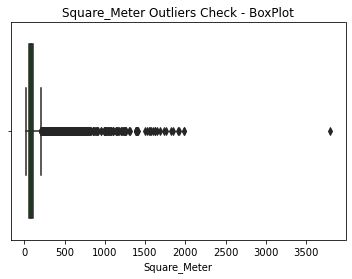

In [85]:
sns.boxplot(
    data = nadlan_df,
    x=nadlan_df['Square_Meter'],
    color='g',
    whis=2,
    width=0.8
).set(title="Square_Meter Outliers Check - BoxPlot")

[Text(0.5, 1.0, 'Square Meter Outliers - ViolinPlot')]

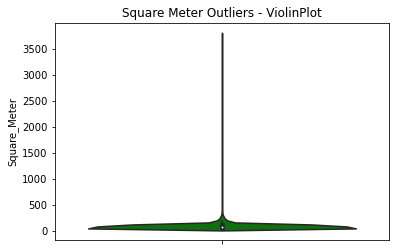

In [86]:
sns.violinplot(
    data = nadlan_df,
    y=nadlan_df['Square_Meter'],
    color='g',
    whis=2,
    width=0.8
).set(title="Square Meter Outliers - ViolinPlot")

#### You can clearly see that there is a long tail to the exceptional values, some of which reach even more than 1000 square meters, of course these records are not really apartments but probably areas 

In [87]:
nadlan_df['Square_Meter'].describe()

count    235301.000000
mean         92.549026
std          52.466209
min          20.040001
25%          61.500000
50%          86.000000
75%         112.000000
max        3800.000000
Name: Square_Meter, dtype: float64

In [88]:
IQR = np.percentile(nadlan_df['Square_Meter'],75) - np.percentile(nadlan_df['Square_Meter'],25)
print(f"Max 'Normal' Value By Deault Of 1.5IQR {nadlan_df['Square_Meter'].median() + 1.5*IQR}")
print(f"Min 'Normal' Value By Deault Of 1.5IQR {nadlan_df['Square_Meter'].median() - 1.5*IQR}")

Max 'Normal' Value By Deault Of 1.5IQR 161.75
Min 'Normal' Value By Deault Of 1.5IQR 10.25


#### We Can See That A Max Normal Value By 1.5IQR Is 157, Which isn't enough.
#### Becasue There's Indeed Some Special 150+ Squere_Meter Appartments, Lets Assume that 300 is the maximum for an appartment to not be an outlier
#### Also, We'll Set The minimum for an appartment to be at least 30 Squere_Meter

In [89]:
sum((nadlan_df['Square_Meter']>300) | (nadlan_df['Square_Meter']<30))

3151

#### There's Only 3151 Of Them, So We'll Delete Them

In [90]:
nadlan_df.drop(index=nadlan_df[(nadlan_df['Square_Meter']>300) | (nadlan_df['Square_Meter']<30)].index,inplace=True)
nadlan_df[(nadlan_df['Square_Meter']>300) | (nadlan_df['Square_Meter']<30)]

,Sale_Date,City,Neighborhood,Street,Building_Number,Property_Type,Rooms,Floor,Square_Meter,Price


[Text(0.5, 1.0, 'Square_Meter Outliers Check - BoxPlot')]

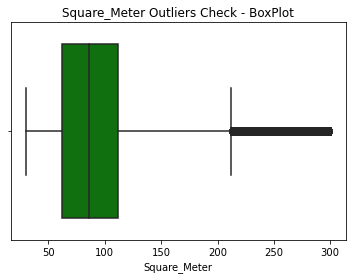

In [91]:
sns.boxplot(
    data = nadlan_df,
    x=nadlan_df['Square_Meter'],
    color='g',
    whis=2,
    width=0.8
).set(title="Square_Meter Outliers Check - BoxPlot")

[Text(0.5, 1.0, 'Square Meter Outliers - ViolinPlot')]

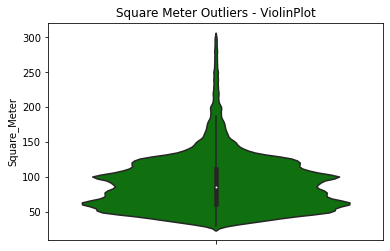

In [92]:
sns.violinplot(
    data = nadlan_df,
    y=nadlan_df['Square_Meter'],
    color='g',
    whis=2,
    width=0.8
).set(title="Square Meter Outliers - ViolinPlot")

Much better.

## 3.2: Price Column Outliers:

[Text(0.5, 1.0, 'Price Outliers Check - BoxPlot')]

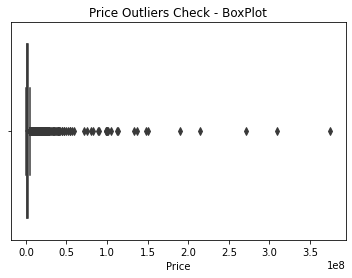

In [93]:
sns.boxplot(
    data = nadlan_df,
    x=nadlan_df['Price'],
    color='m',
    whis=2,
    width=0.8
).set(title="Price Outliers Check - BoxPlot")

[Text(0.5, 1.0, 'Price Outliers - ViolinPlot')]

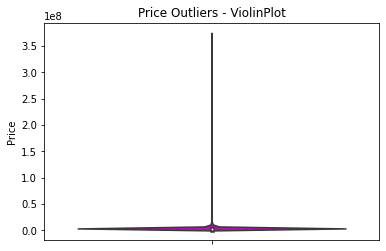

In [94]:
sns.violinplot(
    data = nadlan_df,
    y=nadlan_df['Price'],
    color='m',
    whis=2,
    width=0.8
).set(title="Price Outliers - ViolinPlot")

In [95]:
print(f"Price Max = {nadlan_df['Price'].max():,}")
print(f"Price Mean = {nadlan_df['Price'].mean():,}")
print(f"Price Median = {nadlan_df['Price'].median():,}")

Price Max = 375,000,000
Price Mean = 1,957,732.1111565798
Price Median = 1,622,000.0


In [96]:
nadlan_df[nadlan_df['Price']>5_000_000]

,Sale_Date,City,Neighborhood,Street,Building_Number,Property_Type,Rooms,Floor,Square_Meter,Price
35,2022-05-11,אשדוד,"הקריה מע""ר",כינור,10,1,5.0,31,238.0,6500000
51,2022-02-28,אשדוד,"הקריה מע""ר","צה""ל",2,1,6.0,39,276.0,5590000
66,2022-01-13,אשדוד,"הקריה מע""ר",כינור,22,1,5.0,23,255.0,6050000
118,2021-08-30,אשדוד,"הקריה מע""ר",כינור,10,1,6.0,30,250.0,7350000
274,2020-06-03,אשדוד,"הקריה מע""ר","צה""ל",2,1,6.0,38,289.0,5098000
...,...,...,...,...,...,...,...,...,...,...
235264,2015-06-08,תל אביב -יפו,צמרות איילון,אלוני ניסים,4,1,5.0,30,213.0,5942000
235268,2011-03-29,תל אביב -יפו,צמרות איילון,הרב גורן שלמה,2,1,5.0,30,247.0,9693000
235276,2016-06-25,תל אביב -יפו,בבלי,Unknown,-1,1,5.0,30,179.0,8750000
235277,2021-06-10,תל אביב -יפו,גני שרונה,קרליבך,4,1,5.0,30,142.0,7530000


#### in that table of prices above 5Mil, we can see that most of the apartments have a high squere_meter, number of rooms when the price rises.
#### but some of them are not, is it very unusual for an apartments who cost more then 5mil will have 38 squere meter, 47.. and so on 

In [97]:
nadlan_df[(nadlan_df['Price']>5_000_000) & (nadlan_df['Square_Meter']<60)]

,Sale_Date,City,Neighborhood,Street,Building_Number,Property_Type,Rooms,Floor,Square_Meter,Price
46918,2017-11-02,גבעתיים,"הל""ה",Unknown,-1,1,1.0,1,33.000000,39333000
47279,2008-03-13,גבעתיים,"הל""ה",לכיש,14,1,1.0,1,32.000000,18333000
49471,2019-09-26,גבעתיים,שיכון חברת חשמל,המאבק,38,1,3.0,0,58.000000,5200000
49869,2020-12-14,גבעתיים,שינקין,כצנלסון,106,1,1.0,4,30.000000,72000000
50500,2013-05-29,גבעתיים,שינקין,כצנלסון,104,1,2.0,3,38.000000,80000000
...,...,...,...,...,...,...,...,...,...,...
198599,2014-11-18,תל אביב -יפו,רמת אביב,גרונימן,4,4,2.5,1,55.500000,5300000
198823,2010-03-11,תל אביב -יפו,רמת אביב,גרונימן,6,1,3.0,1,55.500000,6000000
219005,2016-02-27,תל אביב -יפו,לב העיר,Unknown,-1,1,3.0,9,33.000000,10163000
231728,2017-02-06,הרצלייה,הרצליה פיתוח,זבולון,2,1,2.0,4,50.349998,5920000


#### So, We'll Need to find a way to delete apartment with a very high price and very low squere_Meter & number of rooms

In [98]:
nadlan_df.drop(index=nadlan_df[(nadlan_df['Square_Meter']<60) & (nadlan_df['Rooms']<4) & (nadlan_df['Price']>2_500_000)].index,inplace=True)
nadlan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229106 entries, 0 to 235299
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Sale_Date        229106 non-null  datetime64[ns]
 1   City             229106 non-null  object        
 2   Neighborhood     229106 non-null  object        
 3   Street           229106 non-null  object        
 4   Building_Number  229106 non-null  int32         
 5   Property_Type    229106 non-null  category      
 6   Rooms            229106 non-null  float32       
 7   Floor            229106 non-null  int32         
 8   Square_Meter     229106 non-null  float32       
 9   Price            229106 non-null  int32         
dtypes: category(1), datetime64[ns](1), float32(2), int32(3), object(3)
memory usage: 13.3+ MB


# Final Conclusions
**At this point, we finished handling everthing there is to handle, we:**

**examined the raw information** 

**exposed all the NaN values**

**handled duplicates**

**handeled missing values**

**filled in missing values if necessary**

**and preformed various manipulations on the columns to change them to numeric values or categorical variables.**

**discovered multiple outliers and had them removed**

**handled environmental data of all the cities neighborhoods so that it will serve us later for EDA and machine learning


**You can see that at the end, the total number of records has been reduced by about 27%! (from 315k to 229k)**


#### All that is left to do is to save our handled dataset into csv file

In [99]:
nadlan_df.to_csv("Processed Data\AllCities.csv", index=False)

# Step 4: The Data Handling - Environment Data

## At this point, we will handle additional data. 
## This data constitutes additional information for the neighborhoods that we have taken.
## Below is the data we acquired:

#### The amount of schools in the neighborhood
#### The amount of kindergartens and dormitories in the neighborhood
#### The amount of informal educational institutions in the neighborhood
#### The amount of parks and gardens in the neighborhood
#### The amount of public institutions in the neighborhood
#### The amount of community institutions in the neighborhood
#### The amount of religious institutions in the neighborhood
#### The amount of green areas in square meters

#### Average distance from a school in the neighborhood
#### Average distance to a public building in the neighborhood
#### Average distance to public parks and gardens
#### Average distance from green areas in the neighborhood

In [120]:
file_name2 = "Raw Data\AllCitiesEnvironment.csv"
df_Env = pd.read_csv(file_name2)
df_Env.head()

,City,Neighborhood,Schools,Kindergartens_And_Dormitories,Non_Formal_Educational_Institutions,Education_Average_Distance,Green_Areas_SQM,Parks_And_Gardens,Green_Areas_Average_Distance,Parks_And_Gardens_Average_Distance,Public_Institutions,Community_Institutions,Religious_Institutions,Public_Building_Average_Distance
0,אופקים,אזור תעשיה,0 בתי ספר,0 גני ילדים ומעונות,0 מוסדות חינוך בלתי פורמלי,0 מטר,"7,595 מ""ר",NaN,316 מטר,228 מטר,5 מוסדות ציבור,34 מוסדות קהילתיים,0 מוסדות דת,46 מ״ר\nמרחק ממוצע למבנה ציבור
1,אופקים,בן גוריון,4 בתי ספר,12 גני ילדים ומעונות,3 מוסדות חינוך בלתי פורמלי,720 מטר,"18,272 מ""ר",1.0,334 מטר,376 מטר,5 מוסדות ציבור,5 מוסדות קהילתיים,4 מוסדות דת,98 מ״ר\nמרחק ממוצע למבנה ציבור
2,אופקים,דדו,2 בתי ספר,0 גני ילדים ומעונות,0 מוסדות חינוך בלתי פורמלי,687 מטר,"6,602 מ""ר",1.0,342 מטר,211 מטר,7 מוסדות ציבור,2 מוסדות קהילתיים,1 מוסדות דת,108 מ״ר\nמרחק ממוצע למבנה ציבור
3,אופקים,הארזים,0 בתי ספר,15 גני ילדים ומעונות,5 מוסדות חינוך בלתי פורמלי,0 מטר,"18,294 מ""ר",2.0,324 מטר,372 מטר,18 מוסדות ציבור,14 מוסדות קהילתיים,4 מוסדות דת,117 מ״ר\nמרחק ממוצע למבנה ציבור
4,אופקים,"הרי""ף",5 בתי ספר,12 גני ילדים ומעונות,0 מוסדות חינוך בלתי פורמלי,370 מטר,"18,294 מ""ר",1.0,283 מטר,222 מטר,2 מוסדות ציבור,12 מוסדות קהילתיים,5 מוסדות דת,88 מ״ר\nמרחק ממוצע למבנה ציבור


***as you can see, we have some problems with current data.***

***1) All data is accompanied by strings, which we would like to delete.***

***2) In addition, there are many 0 values, which we would not necessarily want to leave as they are.***

# 

### 4.0.1: Removing all information about industrial zones

In [121]:
df_Env.drop(index=df_Env[df_Env.Neighborhood.str.startswith("אזור תעשיה")].index,inplace=True)
df_Env.reset_index(inplace=True,drop=True)

In [122]:
df_Env.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   City                                 288 non-null    object 
 1   Neighborhood                         288 non-null    object 
 2   Schools                              288 non-null    object 
 3   Kindergartens_And_Dormitories        288 non-null    object 
 4   Non_Formal_Educational_Institutions  288 non-null    object 
 5   Education_Average_Distance           288 non-null    object 
 6   Green_Areas_SQM                      288 non-null    object 
 7   Parks_And_Gardens                    194 non-null    float64
 8   Green_Areas_Average_Distance         288 non-null    object 
 9   Parks_And_Gardens_Average_Distance   288 non-null    object 
 10  Public_Institutions                  288 non-null    object 
 11  Community_Institutions          

You can see that there are almost no deficiencies in the data, except in the column for the number of gardens and parks

Therefore, we will now extract all the numerical values ​​in the columns that are not the amount of parks and gardens

### 4.0.2: Extracting numeric values from the columns

In [123]:
column = df_Env.columns[2::]
for i in range(len(df_Env)):
    for col in column:
        if col!='Parks_And_Gardens':
            df_Env.loc[i, col] = df_Env[col][i].rsplit(' ')[0]
df_Env['Green_Areas_SQM'] = df_Env['Green_Areas_SQM'].str.replace(',','')

In [124]:
df_Env

,City,Neighborhood,Schools,Kindergartens_And_Dormitories,Non_Formal_Educational_Institutions,Education_Average_Distance,Green_Areas_SQM,Parks_And_Gardens,Green_Areas_Average_Distance,Parks_And_Gardens_Average_Distance,Public_Institutions,Community_Institutions,Religious_Institutions,Public_Building_Average_Distance
0,אופקים,בן גוריון,4,12,3,720,18272,1.0,334,376,5,5,4,98
1,אופקים,דדו,2,0,0,687,6602,1.0,342,211,7,2,1,108
2,אופקים,הארזים,0,15,5,0,18294,2.0,324,372,18,14,4,117
3,אופקים,"הרי""ף",5,12,0,370,18294,1.0,283,222,2,12,5,88
4,אופקים,יעקב מסיקה,9,10,2,285,21177,1.0,326,377,4,11,7,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,ראש העין,פסגת טל,0,0,0,0,136,NaN,331,622,0,0,0,105
284,ראש העין,"צה""ל",1,10,1,356,98175,4.0,356,405,6,20,12,102
285,ראש העין,ראש העין צפון,בתי,גני,מוסדות,מטר,"מ""ר",NaN,מטר,מטר,מוסדות,מוסדות,מוסדות,מ״ר\nמרחק
286,ראש העין,"רמב""ם",3,15,1,290,87814,3.0,437,434,4,25,23,77


**You can see that we have now arranged all the numerical values, but there are two problems:**

**1) There are values that do not contain numeric values at all, as a result we are left with strings.**

**2) There are still values that contain zeros, and we will have to replace them**

**The solution: First, we will convert all these values to NaN**

### 4.0.3: Converts the desired data to NaN values

In [125]:
for col in column:
    df_Env[col] = pd.to_numeric(df_Env[col],errors='coerce')
df_Env.replace(0,np.nan,inplace=True)
df_Env

,City,Neighborhood,Schools,Kindergartens_And_Dormitories,Non_Formal_Educational_Institutions,Education_Average_Distance,Green_Areas_SQM,Parks_And_Gardens,Green_Areas_Average_Distance,Parks_And_Gardens_Average_Distance,Public_Institutions,Community_Institutions,Religious_Institutions,Public_Building_Average_Distance
0,אופקים,בן גוריון,4.0,12.0,3.0,720.0,18272.0,1.0,334.0,376.0,5.0,5.0,4.0,98.0
1,אופקים,דדו,2.0,NaN,NaN,687.0,6602.0,1.0,342.0,211.0,7.0,2.0,1.0,108.0
2,אופקים,הארזים,NaN,15.0,5.0,NaN,18294.0,2.0,324.0,372.0,18.0,14.0,4.0,117.0
3,אופקים,"הרי""ף",5.0,12.0,NaN,370.0,18294.0,1.0,283.0,222.0,2.0,12.0,5.0,88.0
4,אופקים,יעקב מסיקה,9.0,10.0,2.0,285.0,21177.0,1.0,326.0,377.0,4.0,11.0,7.0,106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,ראש העין,פסגת טל,NaN,NaN,NaN,NaN,136.0,NaN,331.0,622.0,NaN,NaN,NaN,105.0
284,ראש העין,"צה""ל",1.0,10.0,1.0,356.0,98175.0,4.0,356.0,405.0,6.0,20.0,12.0,102.0
285,ראש העין,ראש העין צפון,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
286,ראש העין,"רמב""ם",3.0,15.0,1.0,290.0,87814.0,3.0,437.0,434.0,4.0,25.0,23.0,77.0


Now, we want to replace the NaN values.
But should it be done according to the median or the average?
To answer this question, right now we will fill in according to the median and also according to the average.
We will save the data in two separate DataSets.
In the machine learning phase we can compare training with median and training with average.

### 4.0.4: Filling NaN values according to median and according to average

***Note: The missing values ​​will be filled in according to the average and median data from the same city***

In [147]:
df_Env_MedFill = df_Env.copy()
df_Env_AvgFill = df_Env.copy()
for i in range(len(df_Env)):
    for col in column:
        if pd.isna(df_Env.loc[i,col]):
            df_Env_MedFill.loc[i,col] = df_Env_MedFill[df_Env_MedFill['City']==df_Env_MedFill.loc[i,'City']][col].median()
            df_Env_AvgFill.loc[i,col] = df_Env_AvgFill[df_Env_AvgFill['City']==df_Env_AvgFill.loc[i,'City']][col].mean()

In [149]:
for col in column:
    df_Env_MedFill[col] = df_Env_MedFill[col].astype('int32')
    df_Env_AvgFill[col] = df_Env_AvgFill[col].astype('int32')

In [158]:
df_Env_MedFill

,City,Neighborhood,Schools,Kindergartens_And_Dormitories,Non_Formal_Educational_Institutions,Education_Average_Distance,Green_Areas_SQM,Parks_And_Gardens,Green_Areas_Average_Distance,Parks_And_Gardens_Average_Distance,Public_Institutions,Community_Institutions,Religious_Institutions,Public_Building_Average_Distance
0,אופקים,בן גוריון,4,12,3,720,18272,1,334,376,5,5,4,98
1,אופקים,דדו,2,11,2,687,6602,1,342,211,7,2,1,108
2,אופקים,הארזים,4,15,5,517,18294,2,324,372,18,14,4,117
3,אופקים,"הרי""ף",5,12,2,370,18294,1,283,222,2,12,5,88
4,אופקים,יעקב מסיקה,9,10,2,285,21177,1,326,377,4,11,7,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,ראש העין,פסגת טל,2,7,1,303,136,1,331,622,4,7,5,105
284,ראש העין,"צה""ל",1,10,1,356,98175,4,356,405,6,20,12,102
285,ראש העין,ראש העין צפון,2,7,1,303,87433,1,312,434,4,7,5,112
286,ראש העין,"רמב""ם",3,15,1,290,87814,3,437,434,4,25,23,77


In [159]:
df_Env_AvgFill

,City,Neighborhood,Schools,Kindergartens_And_Dormitories,Non_Formal_Educational_Institutions,Education_Average_Distance,Green_Areas_SQM,Parks_And_Gardens,Green_Areas_Average_Distance,Parks_And_Gardens_Average_Distance,Public_Institutions,Community_Institutions,Religious_Institutions,Public_Building_Average_Distance
0,אופקים,בן גוריון,4,12,3,720,18272,1,334,376,5,5,4,98
1,אופקים,דדו,2,11,2,687,6602,1,342,211,7,2,1,108
2,אופקים,הארזים,4,15,5,515,18294,2,324,372,18,14,4,117
3,אופקים,"הרי""ף",5,12,2,370,18294,1,283,222,2,12,5,88
4,אופקים,יעקב מסיקה,9,10,2,285,21177,1,326,377,4,11,7,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,ראש העין,פסגת טל,2,8,2,353,136,2,331,622,5,13,8,105
284,ראש העין,"צה""ל",1,10,1,356,98175,4,356,405,6,20,12,102
285,ראש העין,ראש העין צפון,2,8,2,353,50030,2,309,476,5,13,8,192
286,ראש העין,"רמב""ם",3,15,1,290,87814,3,437,434,4,25,23,77


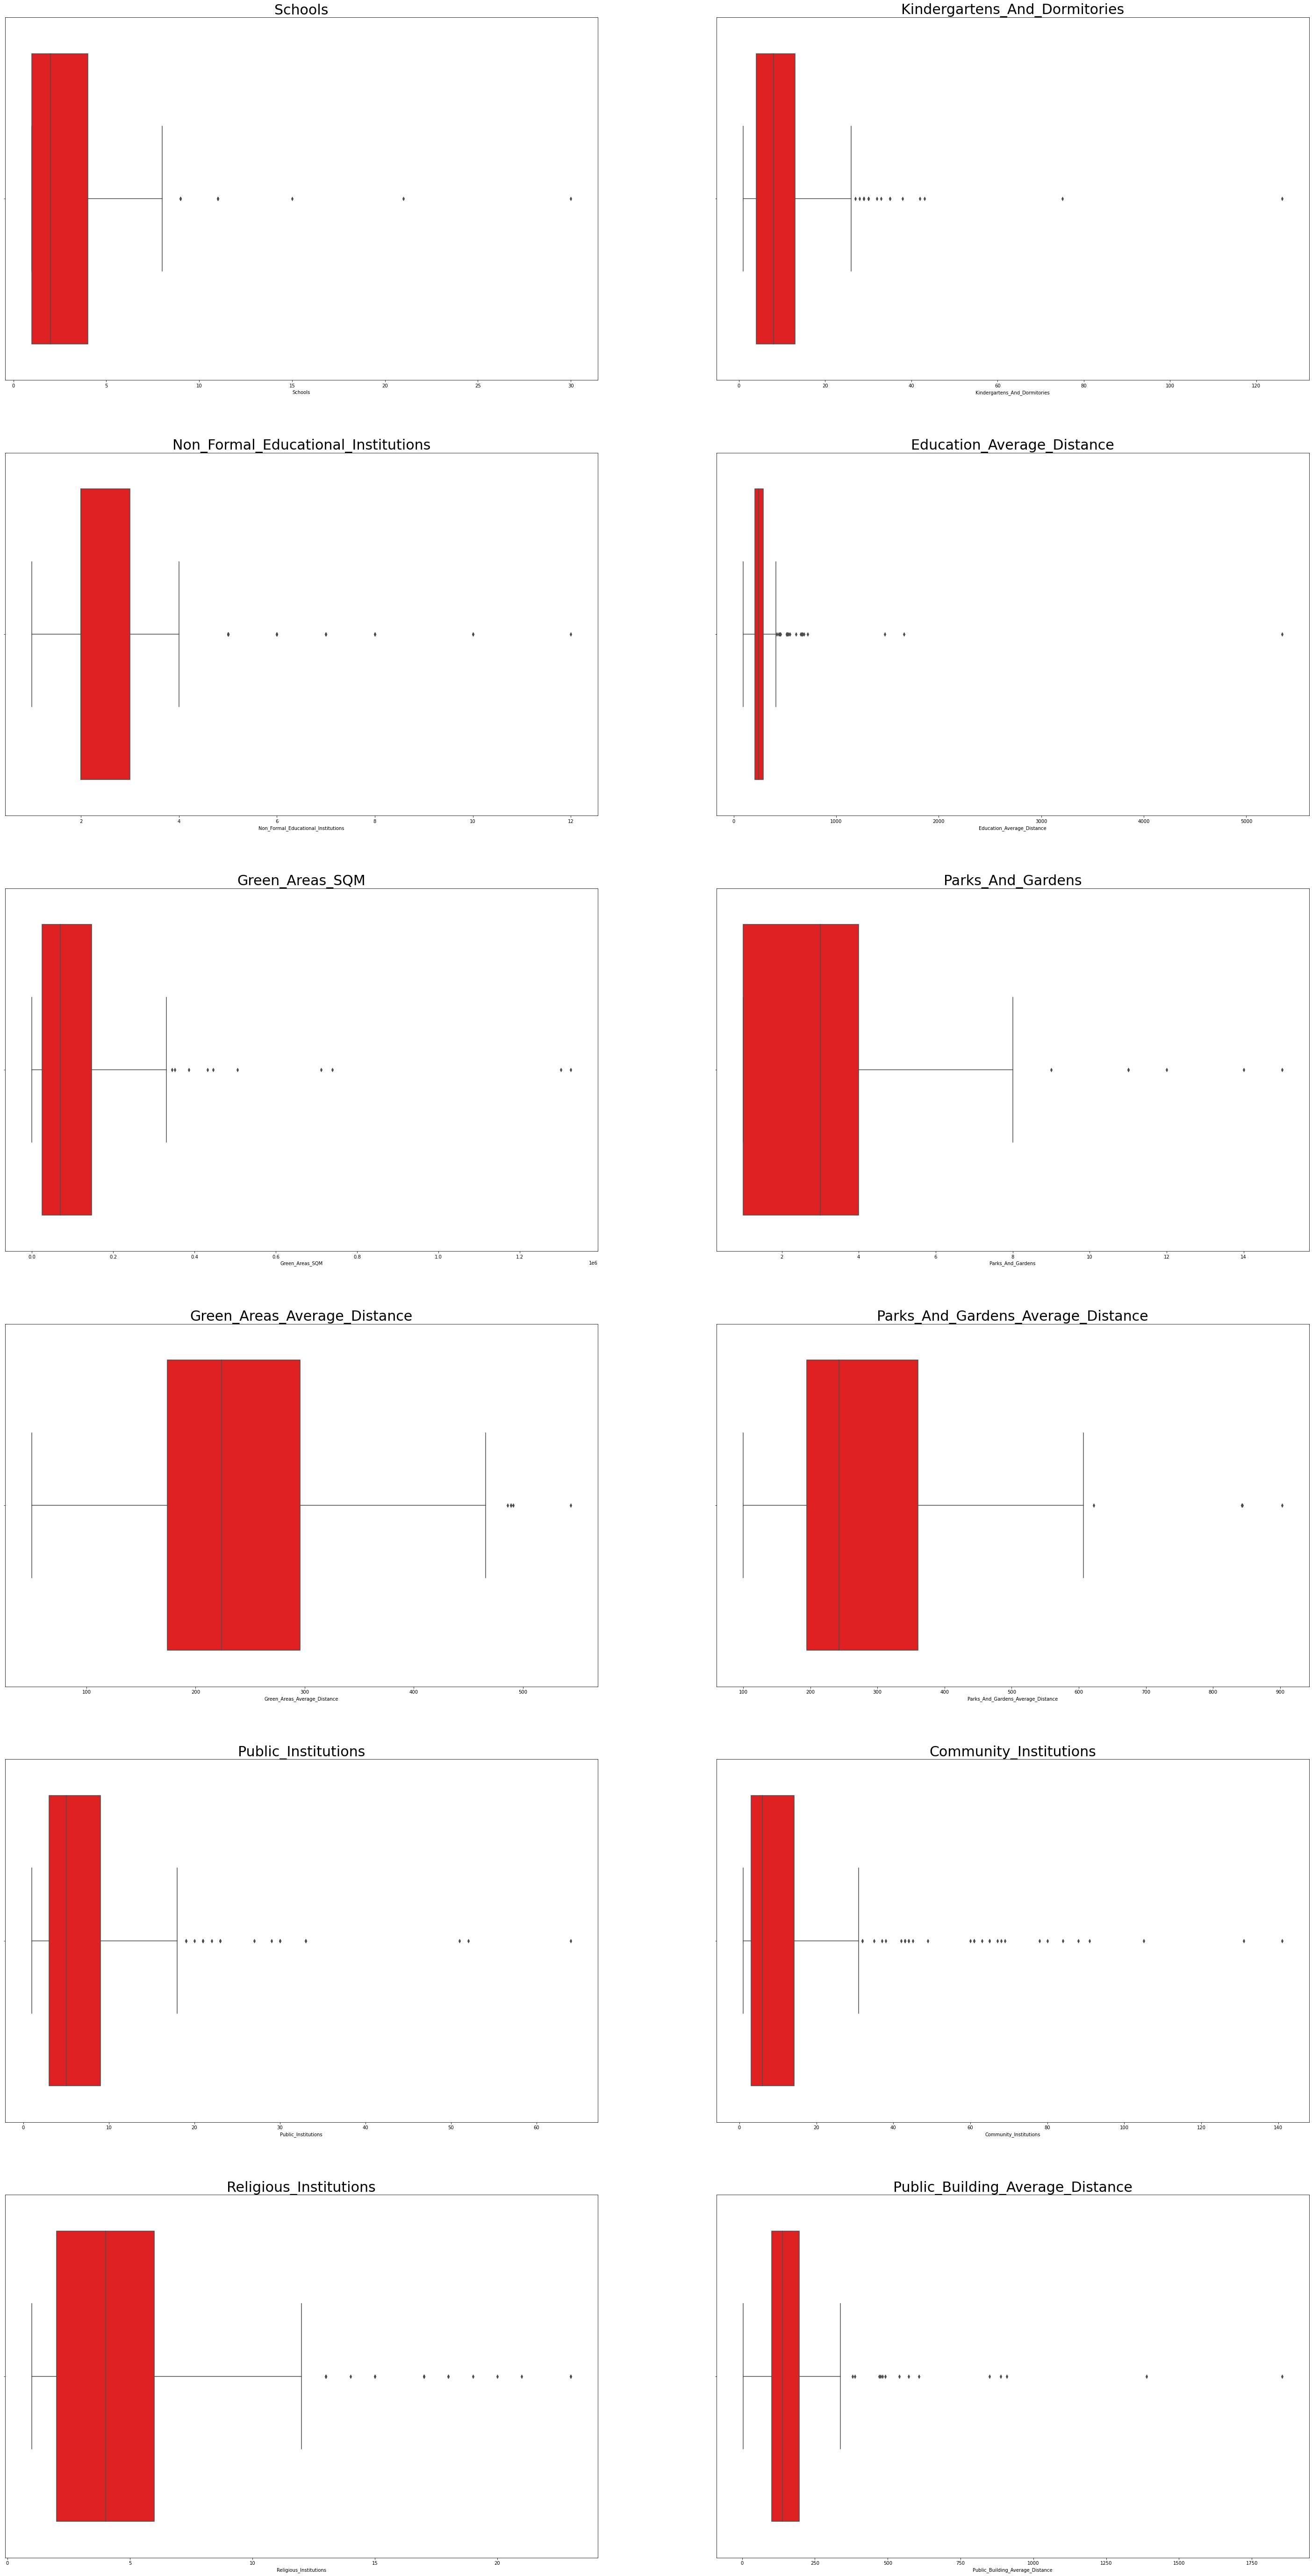

In [155]:
figure,axis = plt.subplots(6,2,figsize=(50,100))
i=0
for col in df_Env_MedFill.columns[2::]:
    sb.boxplot(data=df_Env_MedFill,x=col,ax=axis[int(i/2),int(i%2)],color='r')
    axis[int(i/2),int(i%2)].set_title(col,fontsize=30)
    i+=1

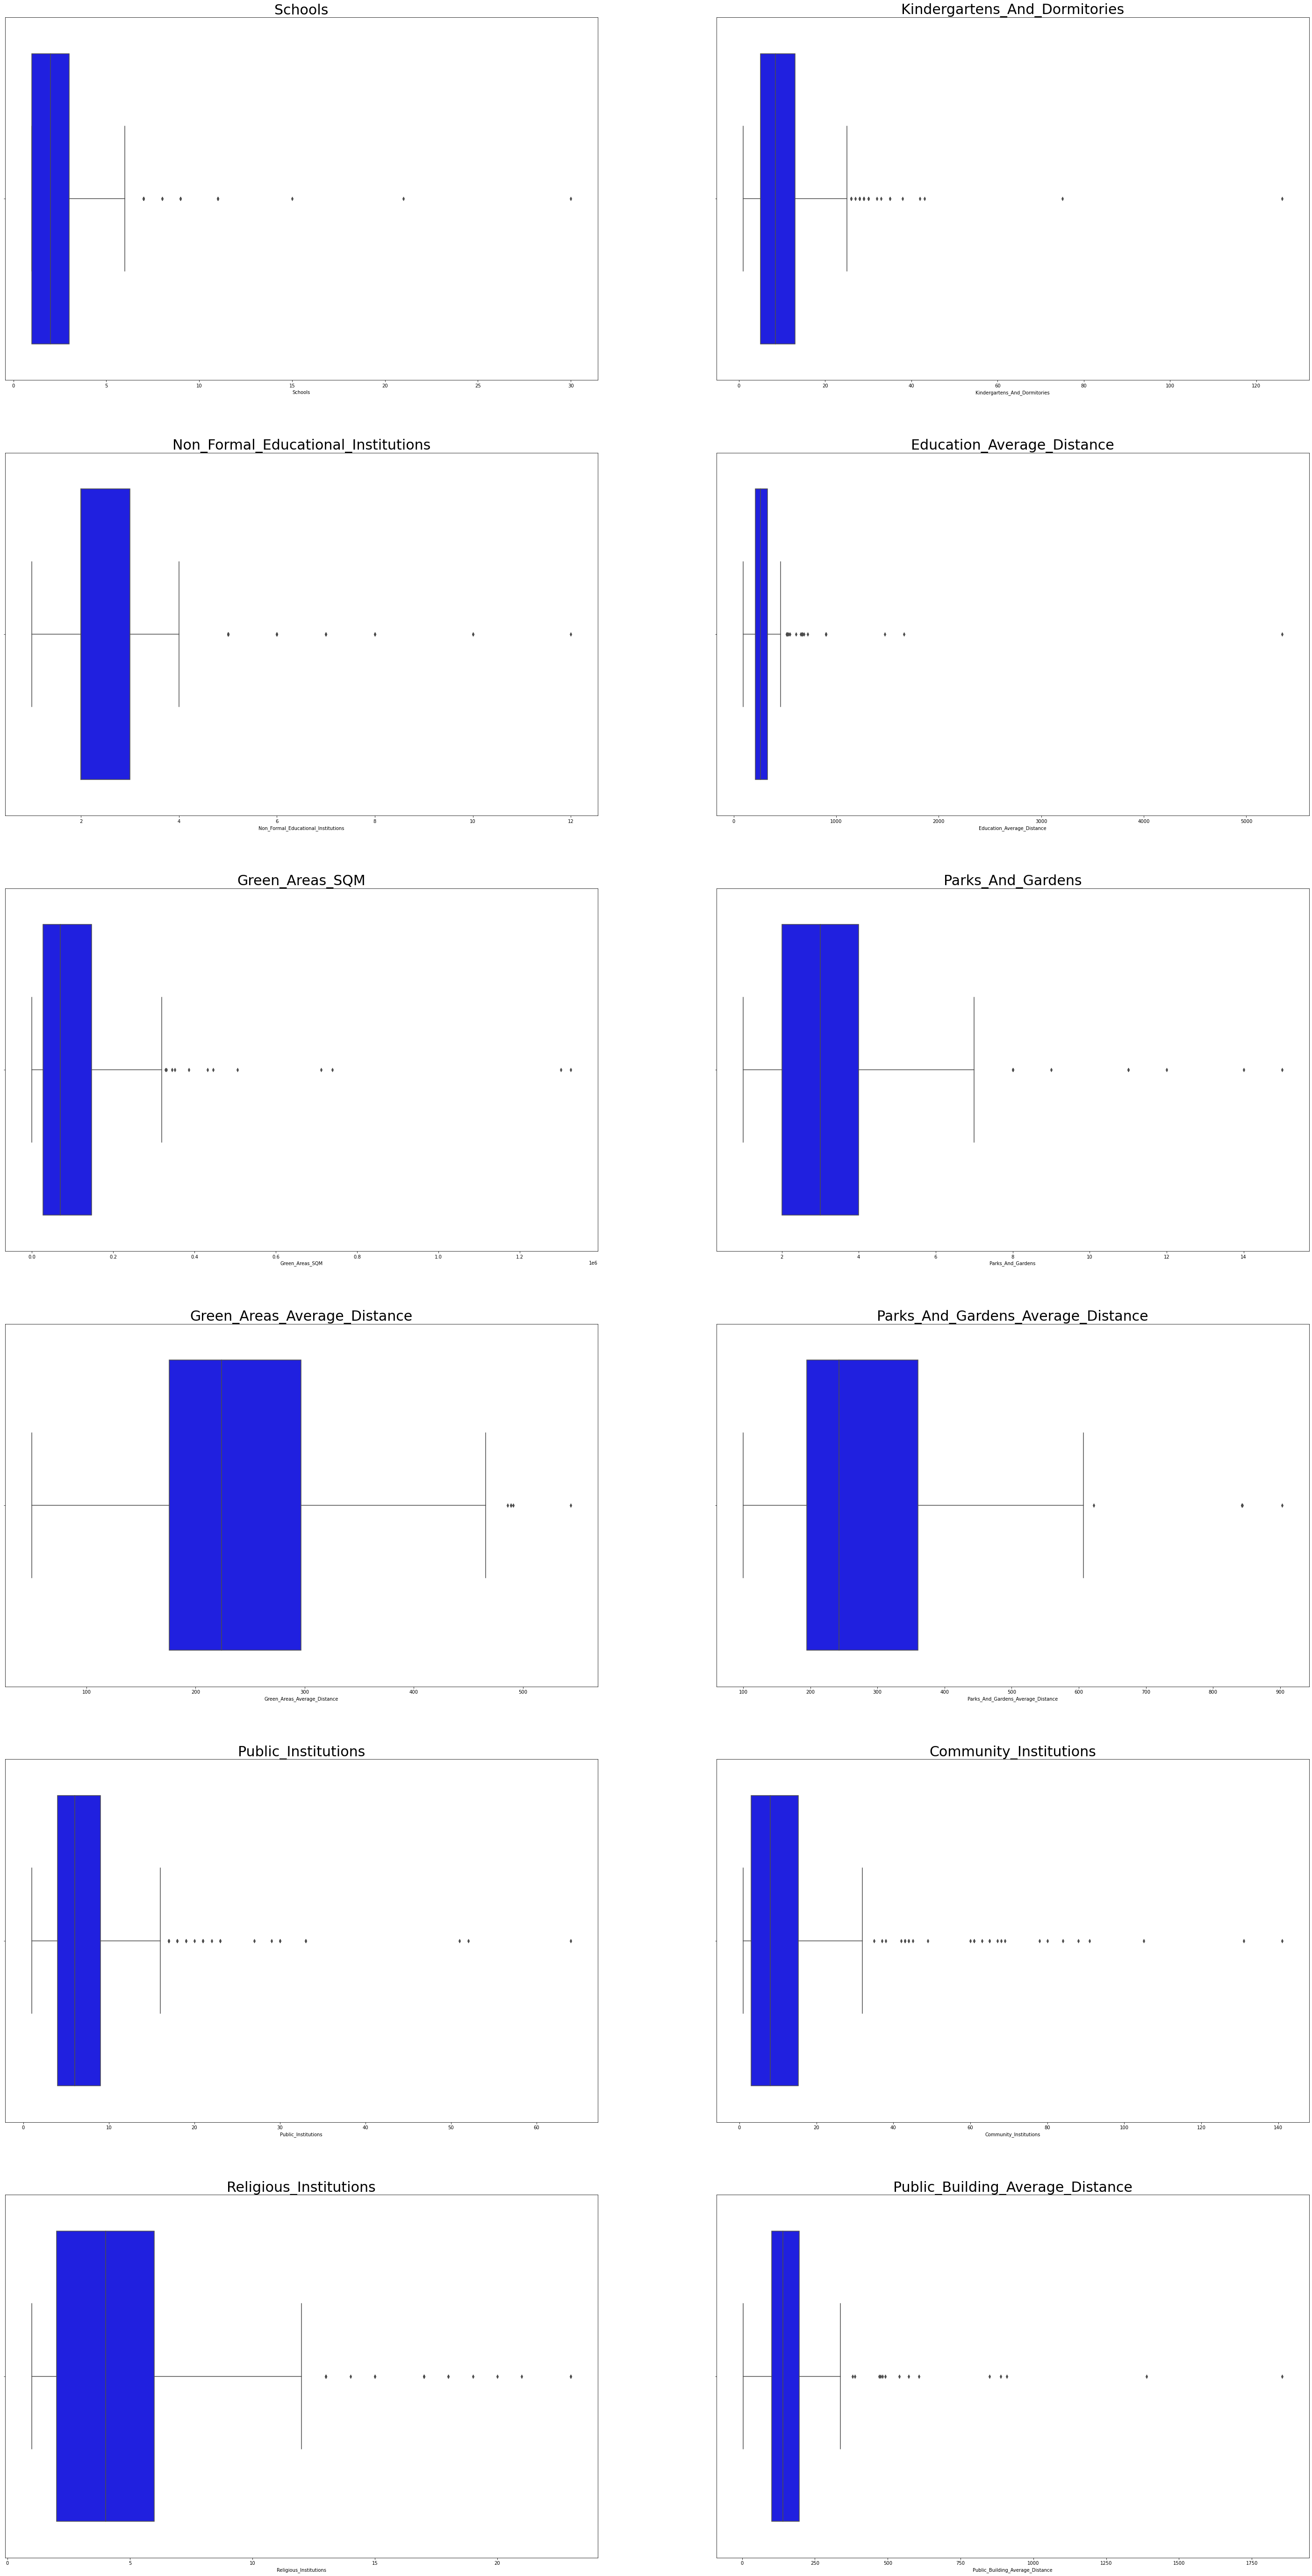

In [156]:
figure,axis = plt.subplots(6,2,figsize=(50,100))
i=0
for col in df_Env_AvgFill.columns[2::]:
    sb.boxplot(data=df_Env_AvgFill,x=col,ax=axis[int(i/2),int(i%2)],color='b')
    axis[int(i/2),int(i%2)].set_title(col,fontsize=30)
    i+=1

#### as you can see, There are almost no differences in terms of completing the average and completing the median.

In [153]:
df_Env_MedFill.to_csv('Processed Data\AllCitiesEnvironment (MedianFill).csv', index=False)
df_Env_AvgFill.to_csv('Processed Data\AllCitiesEnvorinment (AverageFill).csv', index=False)